# Code Exercises

In [103]:
import numpy as np 
import matplotlib.pyplot as plt

Exercise 9-1.
A square Q has the following equalities:
$$ Q^TQ = QQ^T = Q^{-1}Q = QQ^{-1} = I $$
Demonstrate this in code by computing Q from a random-numbers matrix, then
compute $Q ^T $
 and $Q^{−1} $. Then show that all four expressions produce the identity matrix

In [104]:
A = np.random.randn(6, 6)

Q, R = np.linalg.qr(A)
Qinv = np.linalg.inv(Q)

QtQ = Q.T @ Q 
QQt = Q @ Q.T 
QinvQ = Qinv @ Q 
QQinv = Q @ Qinv 
print(f'QtQ = {QtQ}')
print(f'QQt = {QQt}')
print(f'QinvQ = {QinvQ}')
print(f'QQinv = {QQinv}')

QtQ = [[ 1.00000000e+00  2.87952428e-16 -8.25096298e-17  1.56321862e-16
  -6.96640890e-17  1.69239134e-16]
 [ 2.87952428e-16  1.00000000e+00  1.25864555e-17 -2.50534500e-17
  -1.07731507e-17  3.79649554e-17]
 [-8.25096298e-17  1.25864555e-17  1.00000000e+00  5.83594496e-17
  -3.06196961e-17  5.65292069e-17]
 [ 1.56321862e-16 -2.50534500e-17  5.83594496e-17  1.00000000e+00
   1.57968748e-17 -1.14026552e-16]
 [-6.96640890e-17 -1.07731507e-17 -3.06196961e-17  1.57968748e-17
   1.00000000e+00  4.23132388e-17]
 [ 1.69239134e-16  3.79649554e-17  5.65292069e-17 -1.14026552e-16
   4.23132388e-17  1.00000000e+00]]
QQt = [[ 1.00000000e+00 -2.11850857e-16  2.32689607e-16 -2.15677280e-16
   8.94100569e-17 -6.75340672e-17]
 [-2.11850857e-16  1.00000000e+00  1.03769237e-16  4.72860900e-18
   1.02255748e-16 -7.05669346e-18]
 [ 2.32689607e-16  1.03769237e-16  1.00000000e+00  4.53555833e-17
  -8.28520052e-17  2.02886806e-17]
 [-2.15677280e-16  4.72860900e-18  4.53555833e-17  1.00000000e+00
   5.4293013

Exercise 9-2.
Implement the Gram-Schmidt procedure as described earlier.4
 Use a 4 × 4 randomnumbers matrix. Check your answer against Q from np.linalg.qr.
Important: there is a fundamental sign uncertainty in transformations like the
Householder reflection. This means that vectors can “flip” (be multiplied by −1)
depending on minor differences in algorithm and implementation. This feature exists
in many matrix decompositions including eigenvectors. I have a longer and more
in-depth discussion of why this is and what it means in Chapter 13. For now, the
upshot is this: subtract your Q from Python’s Q and add your Q and Python’s Q.
Nonzero columns in one will be zeros in the other.

In [105]:
def GS_process(A : np.array) : 
    Q = np.zeros(A.shape)

    for i in range(A.shape[1]) : 
        Q[:, i] = A[:, i]
        a = A[:, i]
        for j in range(i) : 
            p = Q[:, j]
            Q[:, i] = Q[:, i] - np.dot(a, p) / np.dot(p, p) * p
        
        Q[:, i] /= np.linalg.norm(Q[:, i])

    return Q


In [106]:
A = np.random.randn(4, 4)

Q_1 = GS_process(A)

Q_2, r = np.linalg.qr(A)

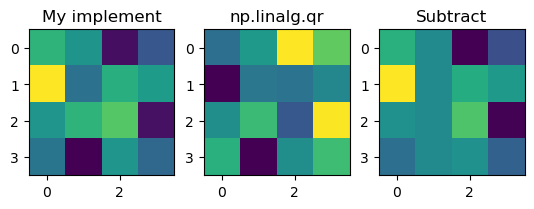

In [107]:
fig, ax = plt.subplots(ncols = 3)

ax[0].imshow(Q_1)
ax[0].set_title('My implement')

ax[1].imshow(Q_2) 
ax[1].set_title('np.linalg.qr')

ax[2].imshow(Q_1 - Q_2)
ax[2].set_title('Subtract')

plt.show()

Exercise 9-3.
In this exercise, you will find out what happens when you apply QR decomposition
to a matrix that is almost-but-not-quite orthogonal. First, create an orthogonal matrix,
called U, from the QR decomposition of a 6 × 6 random-numbers matrix. Compute
the QR decomposition of U, and confirm that R = I (and make sure you understand
why!).
Second, modify the norms of each column of U. Set the norms of columns 1–6 to be
10–15 (that is, the first column of U should have a norm of 10, the second column
Code Exercises | 155
should have a norm of 11, and so on). Run that modulated U matrix through QR
decomposition and confirm that its R is a diagonal matrix with diagonal elements
equaling 10–15. What is Q
TQ for this matrix?
Third, break the orthogonality of U by setting element u1, 4 = 0. What happens to R
and why?


In [108]:
A = np.random.randn(6, 6)

U, R = np.linalg.qr(A)

In [109]:
T, M = np.linalg.qr(U)

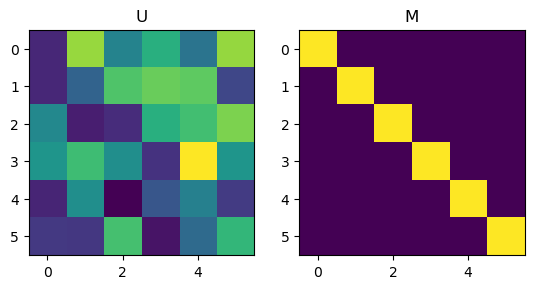

In [110]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(M)
ax[1].set_title('M')

plt.show()

In [111]:
U

array([[-0.51406922,  0.57533721, -0.01603441,  0.25662538, -0.10731012,
         0.57191851],
       [-0.51374074, -0.21062583,  0.39434683,  0.46288801,  0.43437538,
        -0.36503495],
       [ 0.01465547, -0.55419182, -0.49369363,  0.25427644,  0.35367185,
         0.50910014],
       [ 0.09211089,  0.34518182,  0.05113974, -0.4631521 ,  0.80380121,
         0.09562203],
       [-0.52407228,  0.05352491, -0.68022129, -0.28193183, -0.03173067,
        -0.42342643],
       [-0.43411097, -0.44213106,  0.3676735 , -0.60102094, -0.16617933,
         0.30338464]])

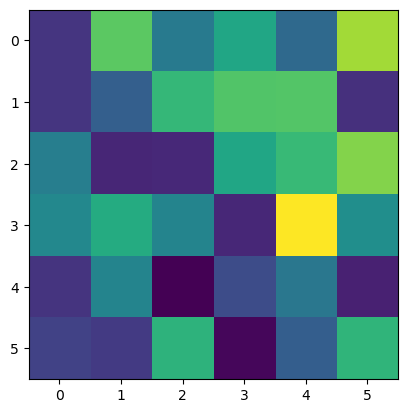

In [112]:
for i in range(U.shape[0]) : 
    U[:, i] = U[:, i] * (10 + i)
plt.imshow(U)

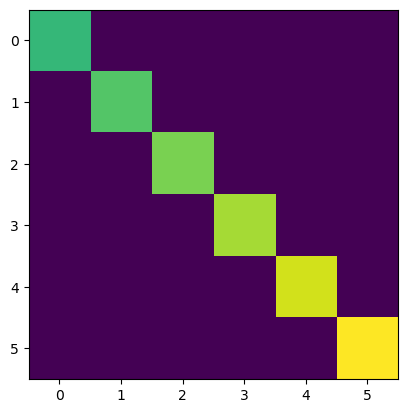

In [113]:
T, R = np.linalg.qr(U)
plt.imshow(R)

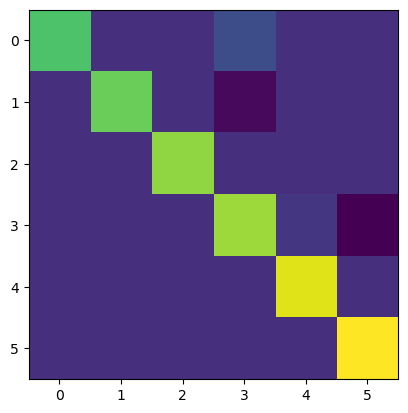

In [114]:
U[0, 3] = 0 
T, R = np.linalg.qr(U)
plt.imshow(R)

Exercise 9-4.
The purpose of this exercise is to compare the numerical errors using the “old-school”
inverse method you learned in the previous chapter to the QR-based inverse method.
We will use random-numbers matrices, keeping in mind that they tend to be numeri‐
cally stable and thus have accurate inverses.
Here’s what to do: copy the code from Exercise 8-2 into a Python function that takes a
matrix as input and provides its inverse as output. (You can also include a check that
the input matrix is square and full-rank.) I called this function oldSchoolInv. Next,
create a 5 × 5 random-numbers matrix. Compute its inverse using the old-school
method and the QR decomposition method introduced in this chapter (you can use
your “old-school method” to compute R
−1). Compute the inverse-estimation error as
the Euclidean distance from the matrix times its inverse to the true identity matrix
from np.eye. Make a barplot of the results, showing the two methods on the x-axis
and the error (Euclidean distance to I) on the y-axis, as in Figure 9-3.


In [115]:
def inverse_matrix (A: np.array) : 
    if A.shape[0] != A.shape[1] : return None 


    minor_matrix = np.zeros(A.shape)
    grid_matrix = np.zeros(A.shape)

    for i in range(A.shape[0]): 
        for j in range(A.shape[1]): 
            grid_matrix[i, j] = (-1) ** (i + j)

            sub_matrix = np.delete(np.delete(A, i, axis = 0), j, axis = 1)
            minor_matrix[i, j] = np.linalg.det(sub_matrix)

    cofactor_matrix = minor_matrix * grid_matrix 
    adj_matrix = cofactor_matrix.T
    return adj_matrix 


def orthogonal_inverse_matrix(A: np.array): 
    Q, R = np.linalg.qr(A)
    return np.linalg.inv(R) * Q.T


In [116]:
sse = []
N = 30
A = np.random.randn(N, N)
sse.append(np.sqrt(np.sum((inverse_matrix(A) - np.eye(N))**2)))
sse.append(np.sqrt(np.sum((orthogonal_inverse_matrix(A) - np.eye(N)) **2)))

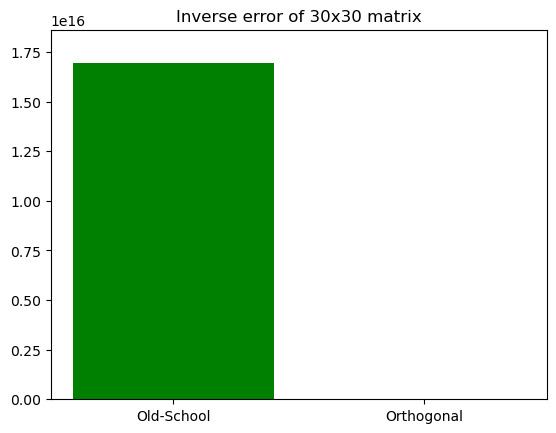

In [117]:

plt.bar(range(2), sse, color = 'green')
plt.xticks(range(2), labels= ['Old-School', 'Orthogonal'])
plt.ylim([0, np.max(sse) * 1.1])
plt.title(f'Inverse error of {N}x{N} matrix')
plt.show()

=> Với matrix càng lớn, hướng tiếp cận sử dụng orthogonal càng tối ưu, ít sai số hơn.

Exercise 9-5.
Put the code from the previous exercise into a for loop over a hundred iterations
in which you repeat the experiment, each time using a different random-numbers
matrix. Store the error (Euclidean distance) for each iteration, and make a plot like
Figure 9-4, which shows the average over all experiment runs (gray bar) and all
individual errors (black dots). Run the experiment for 5 × 5 and 30 × 30 matrices.
You can also try using np.linalg.inv to invert R instead of the old-school method to
see if that has an effect.


In [118]:
def old_school_vs_orthogonal_method(numExp: int, N: int): 
    see = np.zeros((numExp,  2))
    for i in range(numExp): 
        A = np.random.randn(N, N)

        A_old_inv = inverse_matrix(A) 
        see[i, 0] = np.sqrt(np.sum((A_old_inv - np.eye(N)) ** 2))

        A_orth_inv = orthogonal_inverse_matrix(A)
        see[i, 1] = np.sqrt(np.sum((A_orth_inv - np.eye(N)) **2))

    return see 

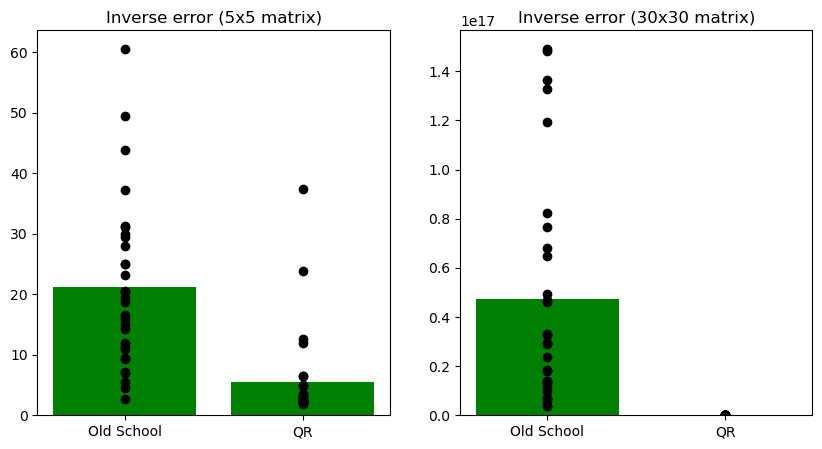

In [119]:
see_5 = old_school_vs_orthogonal_method(30,  5)
see_30 = old_school_vs_orthogonal_method(30, 30)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))


ax[0].bar(range(2), np.mean(see_5, axis = 0), color = 'green')
ax[0].plot(np.zeros(30), see_5[:, 0], 'ko')
ax[0].plot(np.ones(30), see_5[:, 1], 'ko')
ax[0].set_xticks(range(2), labels = ['Old School', 'QR'])
ax[0].set_title(f'Inverse error ({5}x{5} matrix)')



ax[1].bar(range(2), np.mean(see_30, axis = 0), color = 'green')
ax[1].plot(np.zeros(30), see_30[:, 0], 'ko')
ax[1].plot(np.ones(30), see_30[:, 1], 'ko')
ax[1].set_xticks(range(2), labels = ['Old School', 'QR'])
ax[1].set_title(f'Inverse error ({30}x{30} matrix)')

plt.show()

Exercise 9-6.
An interesting property of square orthogonal matrices is that all of their singular
values (and their eigenvalues) are 1. That means that they have an induced 2-norm of
1 (the induced norm is the largest singular value), and they have a Frobenius norm of
M. The latter result is because the Frobenius norm equals the square root of the sum
of the squared singular values. In this exercise, you will confirm these properties.
Create an M × M orthogonal matrix as the QR decomposition of a random matrix.
Compute its induced 2-norm using np.linalg.norm and compute its Frobenius
norm using the equation you learned in Chapter 6, divided by the square root of
Code Exercises | 157
5 Hint: write down the dot-product formula for the vector norm.
M. Confirm that both quantities are 1 (to within a reasonable tolerance of rounding
error). Check using several different values of M.
Next, explore the meaning of the induced norm using matrix-vector multiplication.
Create a random M-element column vector v. Then compute the norms of v and
Qv. Those norms should equal each other (although you wouldn’t expect them to
equal 1).
Finally, get a piece of paper and develop a proof of that empirical demonstration.
That proof is printed in the next paragraph, so don’t look down! But you can check
the footnote if you need a hint.5
I sincerely hope you are reading this to check your reasoning, not because you are
cheating! Anyway, the proof is that the vector norm ∥ v ∥ can be computed as v
Tv;
therefore, the vector norm ∥ Qv ∥ is computed as Qv T
Qv = v
TQ
TQv. The Q
TQ
cancels to give the identity matrix, leaving the dot product of the vector with itself.
The conclusion is that orthogonal matrices can rotate but never scale a vector.


In [120]:
# create matrix 
M = 30
A = np.random.randn(M, M)

Q, R = np.linalg.qr(A)

# Compute matrix induced 2-norm 
lib_norm = np.linalg.norm(Q, 2)
old_norm = np.sqrt(np.sum(Q**2)) / np.sqrt(M)
print(f'Norm of random {M}x{M} matrix using numpy method is {lib_norm}')
print(f'Norm of random {M}x{M} matrix using old school method is :{old_norm}')


Norm of random 30x30 matrix using numpy method is 1.0000000000000004
Norm of random 30x30 matrix using old school method is :1.0


=> A square orthogonal matrix is all of their singular value and their eigenvalues is 1

In [121]:
v = np.random.randn(M, 1)
norm_with_Q = np.linalg.norm(Q @ v)
norm_origin = np.linalg.norm(v)
print(f'Norm is Q @ v is {norm_with_Q}')
print(f'Norm v is {norm_origin}')

Norm is Q @ v is 5.533537506578236
Norm v is 5.533537506578236


Chứng minh : Norm của matrix Q luôn bằng 1 và norm của Q @ v = Q ? 
$$ \| Q \| \|v \| = (Qv) ^T (Qv) = v^T Q^T Q v = v^T v = \| v \| $$ 
- Norm của Q luôn bằng 1 dựa theo công thức dot product để tính norm vì Q là trực giao nên $\| Q \| = (QQ^T) = 1 $$

Exercise 9-7.
This exercise will highlight one feature of the R matrix that is relevant for under‐
standing how to use QR to implement least squares (Chapter 12): when A is tall
and full column-rank, the first N rows of R are upper-triangular, whereas rows N
\+ 1 through M are zeros. Confirm this in Python using a random 10 × 4 matrix.
Make sure to use the complete (full) QR decomposition, not the economy (compact)
decomposition.
Of course, R is noninvertible because it is nonsquare. But (1) the submatrix compris‐
ing the first N rows is square and full-rank (when A is full column-rank) and thus
has a full inverse, and (2) the tall R has a pseudoinverse. Compute both inverses, and
confirm that the full inverse of the first N rows of R equals the first N columns of the
pseudoinverse of the tall R

In [122]:
A = np.random.randn(10, 4)
_, R = np.linalg.qr(A, 'complete')
np.round(R, 3)

array([[-3.758, -0.138, -1.084,  0.94 ],
       [ 0.   , -4.525, -1.224, -0.296],
       [ 0.   ,  0.   ,  2.057, -0.271],
       [ 0.   ,  0.   ,  0.   , -2.176],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ]])

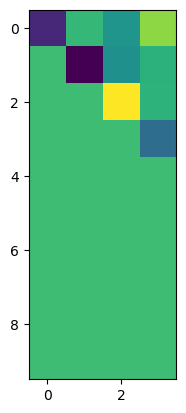

In [123]:
plt.imshow(R)

=> R is noninvertible due to nonsquare. But there are some property that you must watch out. First : the submatrix comprising the first N rows is square and full-rank. The tall R has psuedoinverse and the full inverse of the first N rows in R equals the first N columns of the psuedoinverse of the tall R 

In [124]:
R[:4, :]

array([[-3.75846805, -0.13789891, -1.0842273 ,  0.93971468],
       [ 0.        , -4.52520504, -1.22391009, -0.29640756],
       [ 0.        ,  0.        ,  2.05678278, -0.27104888],
       [ 0.        ,  0.        ,  0.        , -2.17626196]])

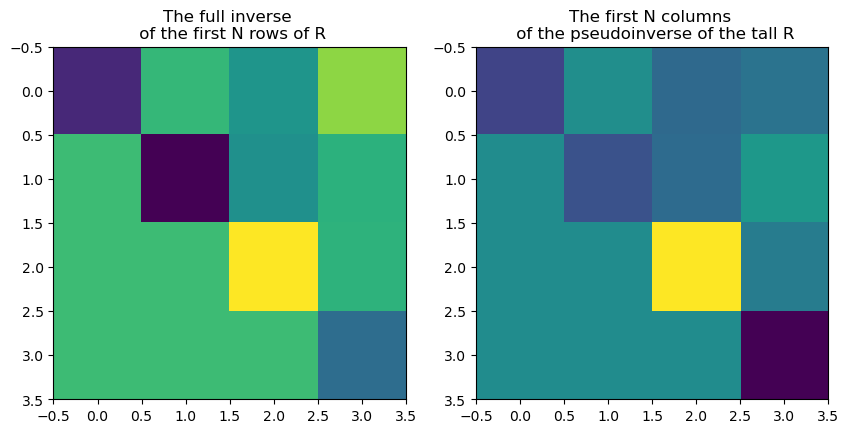

In [125]:
full_inv = R[:4, :]
psudo_inv = np.linalg.pinv(R)

fig, ax = plt.subplots(ncols = 2, figsize = (10, 6))
ax[0].imshow(np.round(full_inv, 3))
ax[0].set_title('The full inverse \n of the first N rows of R')

ax[1].imshow(np.round(psudo_inv[:, :4], 3))
ax[1].set_title('The first N columns \n of the pseudoinverse of the tall R')

plt.show()